# 2.4 Departments table

In [26]:
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series, DataFrame

In [27]:
address = 'C:/Users/Moanesga/Desktop/Data/dept_emp.csv'
dept_emp = pd.read_csv(address)
dept_emp.columns = ['emp_no','dept_no','from_date','to_date']

In [28]:
dept_emp['from_date'] = pd.to_datetime(dept_emp['from_date'])
dept_emp.describe(include='all')

,emp_no,dept_no,from_date,to_date
count,331603.000000,331603,331603,331603
unique,NaN,9,6393,6085
top,NaN,d005,1990-12-28 00:00:00,9999-01-01
freq,NaN,85707,91,240124
first,NaN,NaN,1985-01-01 00:00:00,NaN
last,NaN,NaN,2002-08-01 00:00:00,NaN
mean,253332.605025,NaN,NaN,NaN
std,161831.919445,NaN,NaN,NaN
min,10001.000000,NaN,NaN,NaN
25%,85005.500000,NaN,NaN,NaN


In [29]:
#transforming time variables into date format
date = pd.Timestamp('2003-08-01')
dept_emp.iloc[:, 3] = pd.to_datetime(dept_emp.iloc[:, 3], errors='coerce').fillna(date)
dept_emp.head(5)

,emp_no,dept_no,from_date,to_date
0,10001,d005,1986-06-26,2003-08-01
1,10002,d007,1996-08-03,2003-08-01
2,10003,d004,1995-12-03,2003-08-01
3,10004,d004,1986-12-01,2003-08-01
4,10005,d003,1989-09-12,2003-08-01


In [30]:
dept_emp.describe(include='all')

,emp_no,dept_no,from_date,to_date
count,331603.000000,331603,331603,331603
unique,NaN,9,6393,6085
top,NaN,d005,1990-12-28 00:00:00,2003-08-01 00:00:00
freq,NaN,85707,91,240124
first,NaN,NaN,1985-01-01 00:00:00,1985-02-17 00:00:00
last,NaN,NaN,2002-08-01 00:00:00,2003-08-01 00:00:00
mean,253332.605025,NaN,NaN,NaN
std,161831.919445,NaN,NaN,NaN
min,10001.000000,NaN,NaN,NaN
25%,85005.500000,NaN,NaN,NaN


In [49]:
emp_per_dept= dept_emp.groupby('dept_no', as_index=True)['emp_no'].count()
emp_per_dept_1 = pd.DataFrame(emp_per_dept, columns =['emp_no'])
emp_per_dept_1

,emp_no
dept_no,
d001,20211
d002,17346
d003,17786
d004,73485
d005,85707
d006,20117
d007,52245
d008,21126
d009,23580


In [32]:
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import scipy 
from scipy import stats

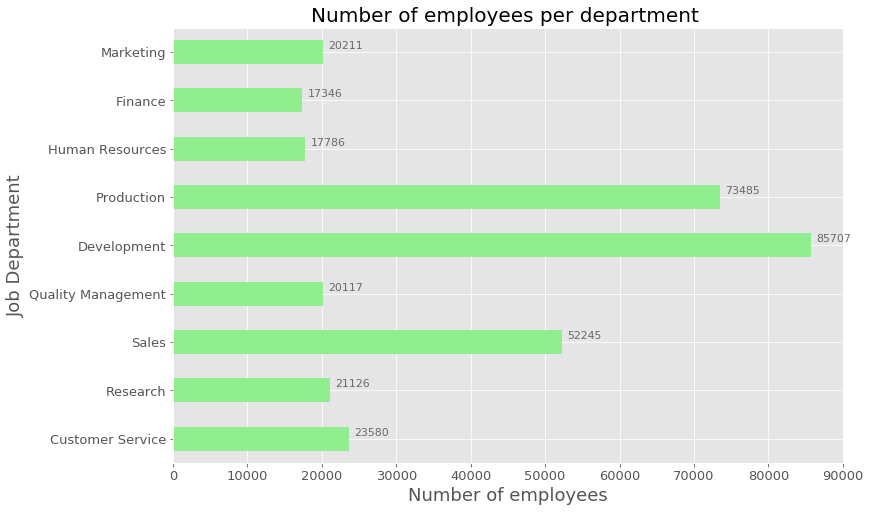

In [72]:
%matplotlib inline
plt.style.use('ggplot')
rcParams['figure.figsize'] = 12, 8

ax = emp_per_dept_1['emp_no'].plot(kind='barh',color = 'lightgreen',fontsize=13)
plt.title("Number of employees per department ",fontsize=20, color='black')
ax.set_xlabel("Number of employees", fontsize=18)
ax.set_ylabel("Job Department", fontsize=18)
ax.set_yticklabels(('Marketing', 'Finance', 'Human Resources', 'Production', 'Development',
                    'Quality Management','Sales','Research','Customer Service'))

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+700, i.get_y()+.18, \
            str(round((i.get_width()), 2)), fontsize=11, color='dimgrey')

ax.invert_yaxis()
plt.show()


In [31]:
dept_emp['duration_in_dept_emp'] = (dept_emp['to_date'] - dept_emp['from_date']).astype('timedelta64[Y]')
dept_emp.head(5)

,emp_no,dept_no,from_date,to_date,duration_in_dept_emp
0,10001,d005,1986-06-26,2003-08-01,17.0
1,10002,d007,1996-08-03,2003-08-01,6.0
2,10003,d004,1995-12-03,2003-08-01,7.0
3,10004,d004,1986-12-01,2003-08-01,16.0
4,10005,d003,1989-09-12,2003-08-01,13.0


In [58]:
duration_in_dept_emp= dept_emp.groupby('dept_no', as_index=True)['duration_in_dept_emp'].mean()
duration_in_dept_emp_1 = pd.DataFrame(duration_in_dept_emp, columns =['duration_in_dept_emp'])
duration_in_dept_emp_1.head()

,duration_in_dept_emp
dept_no,
d001,7.995646
d002,8.551885
d003,8.549590
d004,8.348656
d005,8.566733


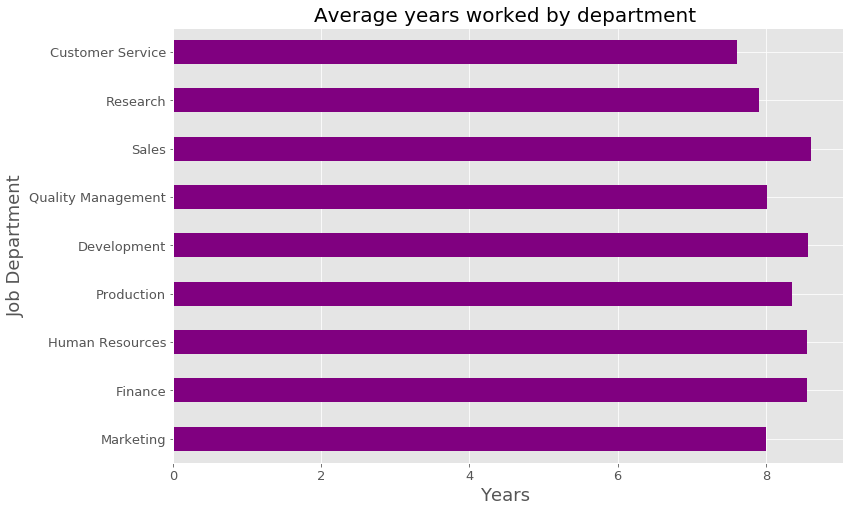

In [64]:
%matplotlib inline
plt.style.use('ggplot')
rcParams['figure.figsize'] = 12, 8

ax1 = duration_in_dept_emp_1['duration_in_dept_emp'].plot(kind='barh',color = 'purple',fontsize=13)
plt.title("Average years worked by department ",fontsize=20, color='black')
ax1.set_xlabel("Years ", fontsize=18)
ax1.set_ylabel("Job Department", fontsize=18)
ax1.set_yticklabels(('Marketing', 'Finance', 'Human Resources', 'Production', 'Development',
                    'Quality Management','Sales','Research','Customer Service'))

plt.show()